
#### 201908424 Cuahuizo Astorga María Fernanda

# Rendimiento de los estudiantes en los exámenes
La base de datos que analizaremos se trata de las notas obtenidas por los alumnos en diversas materias.


In [7]:
import pandas as pd 
import numpy as np
from empiricaldist import Pmf, Cdf
import matplotlib.pyplot as plt

In [8]:
notas = pd.read_csv('StudentsPerformance.csv')
notas.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## 1) Comprensión de los datos
A continuacion vamos a ver respectivamente:
<li>Tipo de dato
    <li>Número de filas y columnas
        <li>Nombres de las columnas     

In [9]:
#Tipo de dato
print(type(notas))
#Número de filas y columnas
print(notas.shape)
#Nombres de las columnas
print(notas.columns)


<class 'pandas.core.frame.DataFrame'>
(1000, 8)
Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


### Observaciones
En resumen, vemos que se trata de un DataFrame, el cual contiene 1,000 renglones y 8 columnas. Por los nombres de las columnas, se observa que esta base de datos se trata de las calificaciones obtenidas por los estudiantes en las materias de matemáticas (<code>'math score'</code>) , lectura (<code>'reading score'</code>) y redacción (<code> 'writing score' </code>), tomando en cuenta si la persona es hombre o mujer (<code>'gender'</code>) , la raza o etnia (<code>'race/ethnicity'</code>), el nivel educativo de los padres (<code>'parental level of education'</code>) , si comieron o no antes de realizar el examen (<code> 'lunch'</code>) y si tuvieron un curso de preparación para el mismo (<code>'test preparation course'</code>). 

## 2) Verificación de valores faltantes

A continuación veremos que con ambas instrucciones confirmamos que no faltan valores en nuestro conjunto de datos.

In [10]:
#Vemos si falta al menos un valor en los datos
notas.isnull().values.any()

#Vemos cuantos valores faltan en cada una de las columnas de DataFrame
notas.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Nuestra base de datos está completa, es decir, no le hace falta algún dato.

## 3) Descartar datos
Eliminaremos las filas duplicadas, en caso de que las haya, guardaresmos los cambios en los datos originales.

In [11]:
notas.drop_duplicates(inplace = True)
notas

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


# <span style="color:green"> Análisis de la variable  <code>'math score'</code>  </span>

A continuación, la variable que vamos a analizar será <code>'math score'</code>, es decir, el puntaje obtenido en el examen de matemáticas, tanto en mujeres como en hombres, pero antes se presentarán unas medidas de tendencia central (media y mediana), unas medidas de variabilidad (max, min, desviación estandar) y los cuantiles de dicha variable.

Observaremos que de los 1000 datos que tenemos, la media esta en 66 puntos, la desviación estándar es de 15.16, el puntaje mínimo es de 0 y el máximo de 100 puntos, el 25% de los datos tendrán un valor igual o más pequeño a 57, el 50% de los datos tendrán un valor igual o más pequeño a 66 y el 75%  de los datos obtiene 77 puntos o menos.


In [12]:
notas['math score'].describe()

count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: math score, dtype: float64

## 1) Función de masa de probabilidad (PMF)



Sabemos que esta función, nos dice la probabilidad de que una variable aleatoria discreta tome un cierto valor.

Una de sus características es que todas las probabilidades deben sumar 1.

A menudo, se visualisan por medio de graficas de barras. 

### 1.1 Mujeres

Extraemos los datos de la columna  <code>'math score'</code> perteneciente solo a las mujeres.

In [13]:
#Identificamos solo a las mujeres
mujeres = notas['gender']== 'female'
print(mujeres.head())

#Extraemos los datos de la columna 'math score'
math_score = notas['math score']
print(math_score.head())

#Extraemos los datos de la columna 'math score' perteneciente solo a las mujeres.
mujeres_math_score = math_score[mujeres]
mujeres_math_score.head(5)

0     True
1     True
2     True
3    False
4    False
Name: gender, dtype: bool
0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64


0    72
1    69
2    90
5    71
6    88
Name: math score, dtype: int64

### Estadísticas

Observaremos que hay 518 mujeres, la media esta en 63.63 puntos, la desviación estándar es de 15.49, el puntaje mínimo es de 0 y el máximo de 100 puntos, el 25% de los datos tendrán un valor igual o más pequeño a 54, el 50% de los datos tendrán un valor igual o más pequeño a 65 y el 75%  de los datos obtiene 74 puntos o menos.


In [14]:
mujeres_math_score.describe()

count    518.000000
mean      63.633205
std       15.491453
min        0.000000
25%       54.000000
50%       65.000000
75%       74.000000
max      100.000000
Name: math score, dtype: float64

### HISTORAMA 

Con el histograma podemos ver la forma general de la distribución y la tendencia central

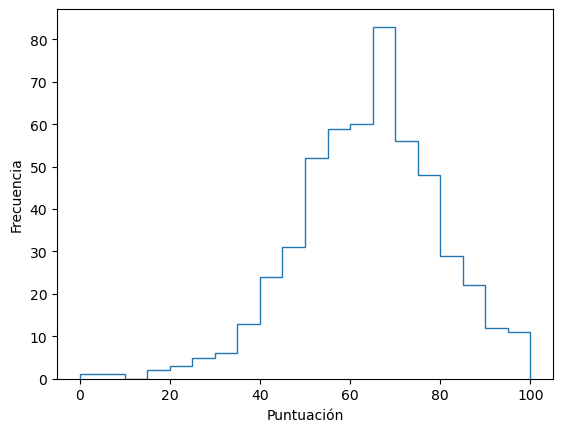

In [15]:
plt.hist(mujeres_math_score,bins=20,histtype='step')
plt.xlabel('Puntuación')
plt.ylabel('Frecuencia')
plt.show()

### PMF

0     0.001931
8     0.001931
18    0.001931
19    0.001931
22    0.001931
23    0.001931
24    0.001931
26    0.001931
27    0.001931
29    0.005792
Name: , dtype: float64


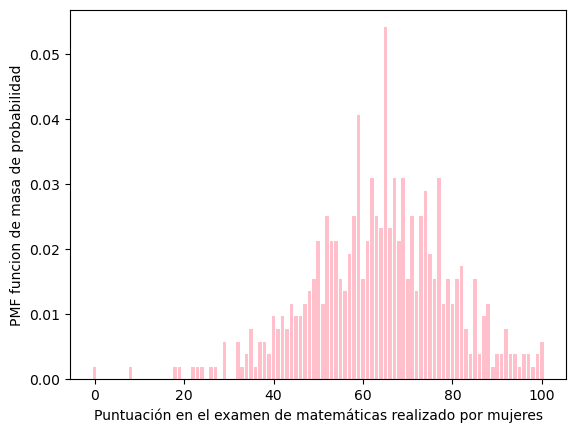

In [16]:
#Sacamos su proporción
pmf_mujeres_math_score = Pmf(Pmf.from_seq(mujeres_math_score, normalize = True))
print(pmf_mujeres_math_score.head(10))

#graficamos la pmf
pmf_mujeres_math_score.bar(label="puntuacion", color = 'pink')
plt.xlabel('Puntuación en el examen de matemáticas realizado por mujeres')
plt.ylabel('PMF funcion de masa de probabilidad')
plt.show()

Observemos que la probabilidad de que las mujeres tengan una puntuación de 0 es baja y, es menor en comparación a la probabilidad de que se obtenga una puntuación de 100. 

Por otro lado, notemos que la puntuación que más obtienen las mujeres está entre los 60 y 80 puntos y dicha puntuación la obtienen 80 mujeres de acuerdo con el histograma.

Asimismo, note que la forma de la grafica es simétrica, ya que conforme el puntaje va llegando a 70 aproximadamente la probabilidad tambien aumenta y una vez pasando este pico la probabilidad disminuye hasta que el puntaje llega a 100, esto también se puede ver con el histograma.

### 1.2 Hombres
Extraemos los datos de la columna  <code>'math score'</code> perteneciente solo a los hombres

In [17]:
#mostramos los primeros 5 valores del puntaje perteneciente a los hombres
hombres_math_score = math_score[~mujeres]
hombres_math_score.head(5)

3     47
4     76
7     40
8     64
10    58
Name: math score, dtype: int64

### Estadísticas

Observaremos que hay 482 hombres, la media está en 68.72 puntos, la desviación estándar es de 14.35, el puntaje mínimo es de 27 y el máximo de 100 puntos, el 25% de los datos tendrán un valor igual o más pequeño a 59, el 50% de los datos tendrán un valor igual o más pequeño a 69 y el 75%  de los datos obtiene 79 puntos o menos.

In [18]:
hombres_math_score.describe()

count    482.000000
mean      68.728216
std       14.356277
min       27.000000
25%       59.000000
50%       69.000000
75%       79.000000
max      100.000000
Name: math score, dtype: float64

### Histograma

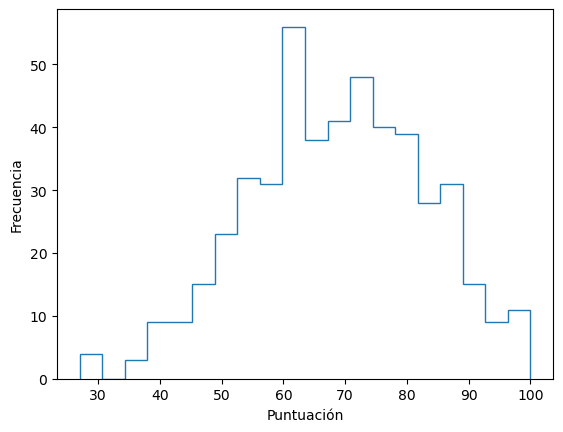

In [19]:
plt.hist(hombres_math_score,bins=20,histtype='step')
plt.xlabel('Puntuación')
plt.ylabel('Frecuencia')
plt.show()


A partir de 35 puntos hasta 58 puntos aproximadamente, la frecuencia del puntaje de los hombres va creciendo, de 58 a 60 puntos baja la cantidad de hombres en una proporción muy mínima y de ahí tiene una gran alza llegando a más de 50 hombres que obtiene un puntaje entre los 60 y 65 aproximadamente, otra barra más alta es la de 48 hombres que tienen un puntaje de entre 70 y 75 puntos y a partir de ahí la frecuencia va disminuyendo.

## PMF

27    0.002075
28    0.002075
30    0.004149
35    0.002075
36    0.002075
37    0.002075
39    0.004149
40    0.010373
41    0.004149
42    0.002075
Name: , dtype: float64


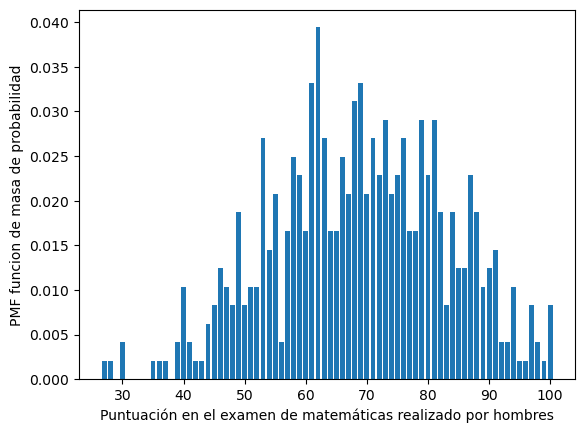

In [20]:
#Sacamos su proporción
pmf_hombres_math_score = Pmf(Pmf.from_seq(hombres_math_score, normalize = True))
print(pmf_hombres_math_score.head(10))

#graficamos la pmf
pmf_hombres_math_score .bar(label="puntuacion")
plt.xlabel('Puntuación en el examen de matemáticas realizado por hombres')
plt.ylabel('PMF funcion de masa de probabilidad')
plt.show()

Podemos notar que la mínima puntuación es menor a 30 puntos pero mayor a 0, en especifico es de 27 puntos.

Por otro lado, se alcanza a ver que la mayor parte de los hombres alcanza un puntaje entre los 60 y 65 puntos, de acuerdo con el histograma son mas de 50, además la gráfica tiene varios picos, esto significa que hay una variedad de calificaciones que los hombres alcanzan, esto mismo se puede ver con el histograma.



## Conclusión
Con los gráficos, podemos ver que los hombres obtienen mejores puntajes que las mujeres, lo cual podemos confirmarlo con los estadísticos calculados, notemos que el minimo de los primeros es de 27 mientras que de las mujeres es de 0 y la media en hombres es de 68.72 y en mujeres es de 5.09 puntos menos, es decir, es de 63.63.
Asimismo, existe una mayor probabilidad de que los hombres saquen 100 puntos a que lo hagan las mujeres.

# 2) Función de distribución acumulativa (CDF)


Esta función nos dice la probabilidad de obtener un valor menor o igual a cierto valor dado en determindada variable aleatoria.

Dicha función se calcula por medio de la siguiente fórmula:
$$F(x)= P[X\leq x]$$

## 2.1 Mujeres

In [21]:
# Calculamos la CDF del puntaje de matematicas en mujeres
cdf_mujeres_math_score = Cdf.from_seq(mujeres_math_score)
print(cdf_mujeres_math_score)

0      0.001931
8      0.003861
18     0.005792
19     0.007722
22     0.009653
         ...   
96     0.984556
97     0.988417
98     0.990347
99     0.994208
100    1.000000
Name: , Length: 79, dtype: float64


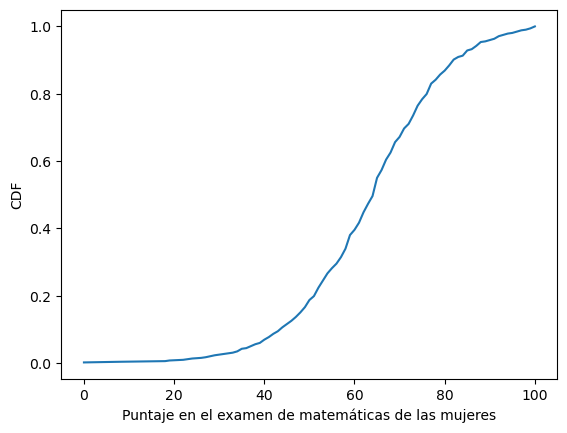

In [22]:
#Graficamos la CDF del puntaje de matematicas en mujeres
cdf_mujeres_math_score=Cdf.from_seq(mujeres_math_score)
cdf_mujeres_math_score.plot()
plt.xlabel('Puntaje en el examen de matemáticas de las mujeres')
plt.ylabel('CDF')
plt.show()

## 2.2 Hombres

In [23]:
# Calculamos la CDF del puntaje de matematicas en hombres
cdf_hombres_math_score = Cdf.from_seq(hombres_math_score)
print(cdf_hombres_math_score)

27     0.002075
28     0.004149
30     0.008299
35     0.010373
36     0.012448
         ...   
96     0.977178
97     0.985477
98     0.989627
99     0.991701
100    1.000000
Name: , Length: 68, dtype: float64


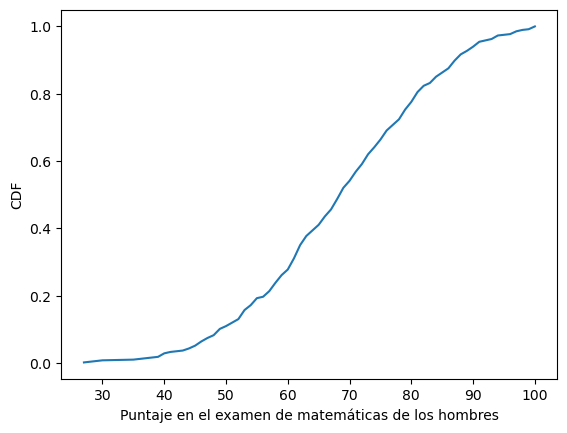

In [24]:
#Graficamos la CDF del puntaje de matematicas en hombres
cdf_hombres_math_score=Cdf.from_seq(hombres_math_score)
cdf_hombres_math_score.plot()
plt.xlabel('Puntaje en el examen de matemáticas de los hombres')
plt.ylabel('CDF')
plt.show()

## Ambas funciones de distribución acumulada

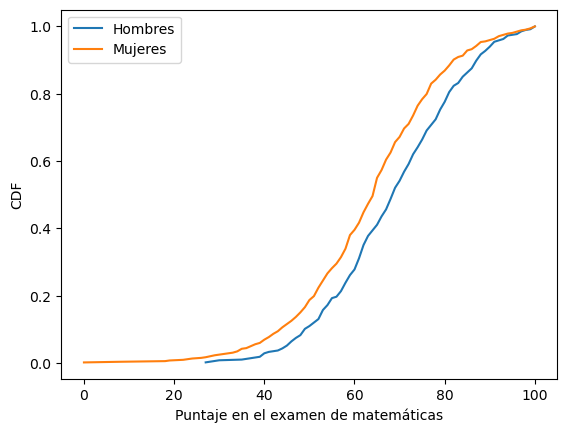

In [25]:
Cdf.from_seq(hombres_math_score).plot(label='Hombres')
Cdf.from_seq(mujeres_math_score).plot(label='Mujeres')
plt.xlabel('Puntaje en el examen de matemáticas')
plt.ylabel('CDF')
plt.legend()
plt.show()

Podemos observar que:

<li> La función de distribución tanto de hombres como de mujeres hace referencia a la distribución normal. 
    <li> Las mujeres son quienes sacan los puntajes más bajos, ya que con ellas empezamos de 0 y los hombres empiezan con puntajes de 27.    
        <li>Las probabilides de obtener un  puntaje menor o igual a 90 aproximadamente siempre son menores en hombres que en mujeres, pasando este valor las probabilidades se tornan casi iguales.
        <li> La distribución de las mujeres tiene más probabilidad porque la distribución de las mujeres es mayor que la dispersión de los hombres.
            <li> Los hombres son mejores en matemáticas.
               